In [1]:
from imageai.Detection import ObjectDetection
import os
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath( os.path.join(execution_path , "yolo.h5"))
detector.loadModel()

In [2]:
custom = detector.CustomObjects(bottle=True)


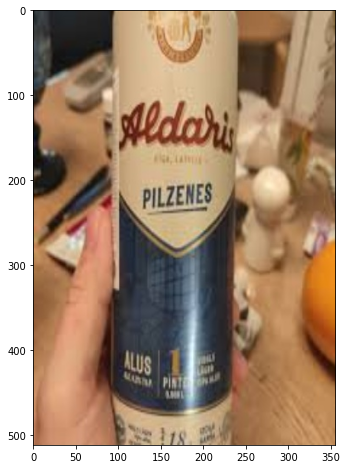

In [3]:
req = "images_for_detector/97d591da27.jpg"
img = cv2.imread(req,cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.imshow(img[...,::-1])


In [4]:
detections = detector.detectCustomObjectsFromImage(custom_objects=custom, input_image=os.path.join(execution_path , req), output_image_path=os.path.join(execution_path , "image3custom.jpg"), minimum_percentage_probability=30)


<ipython-input-4-5942e7de6619>:1: DeprecationWarning: 'detectCustomObjectsFromImage()' function has been deprecated and will be removed in future versions of ImageAI. 
 Kindly use 'detectObjectsFromImage()' 
  detections = detector.detectCustomObjectsFromImage(custom_objects=custom, input_image=os.path.join(execution_path , req), output_image_path=os.path.join(execution_path , "image3custom.jpg"), minimum_percentage_probability=30)


In [5]:
detections

[{'name': 'bottle',
  'percentage_probability': 71.92279696464539,
  'box_points': [89, 44, 246, 498]}]

In [6]:
probabilities_and_boxes = {}
for eachObject in detections:
    probabilities_and_boxes[eachObject["percentage_probability"]] = eachObject["box_points"]
    print(eachObject["name"] , " : ", eachObject["percentage_probability"], " : ", eachObject["box_points"] )
    print("--------------------------------")

bottle  :  71.92279696464539  :  [89, 44, 246, 498]
--------------------------------


In [7]:
top_box = probabilities_and_boxes[sorted(probabilities_and_boxes)[-1]]

In [8]:
img = cv2.imread("image3custom.jpg",cv2.COLOR_BGR2RGB)

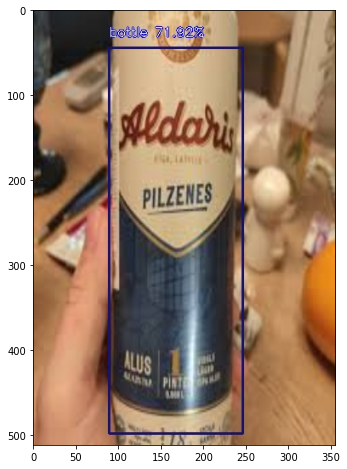

In [9]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.imshow(img[...,::-1])


In [10]:
img = cv2.imread(req,cv2.COLOR_BGR2RGB)

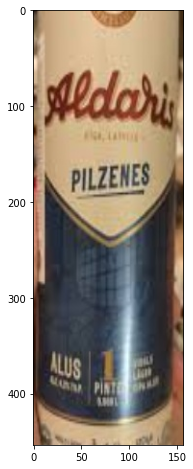

In [11]:
x1 = top_box[0]
y1 = top_box[1]
x2 = top_box[2]
y2 = top_box[3]
crop_img = img[y1:y2,x1:x2]
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.imshow(crop_img[...,::-1])


In [12]:
import numpy as np
IMG_HEIGHT = 512
IMG_WIDTH=256
crop_img=cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
crop_img=np.array([crop_img])

In [13]:
import keras

In [14]:
mod = keras.models.load_model('cnn_done/beerday')


In [15]:
pred = mod.predict(crop_img)

In [16]:
a = np.argsort((-1)*pred)[0][:5]

In [17]:
with open ("folder_names.txt",'r',encoding='utf8') as r:
    names = sorted(r.read().splitlines())

In [18]:
names[a[0]]

'aldaris_pilzenes'